# Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# loading dataset as pandas dataframe
df = pd.read_csv('curated_aqsoldb.csv')

##### Using descriptors based on Delaney's method - MolLogP, MolWt, NumRotatableBonds, AromaticProportion (AP) (https://pubmed.ncbi.nlm.nih.gov/15154768/)

Note: From my own EDA, I have found that MolLogP and MolWt have a much larger correlation to solubility that NumRotatableBonds and AromaticProportion

In [5]:
# creating X matrix from descriptors chosen
X = df[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AP']]
X

,MolLogP,MolWt,NumRotatableBonds,AP
0,3.95810,392.510,17.0,0.000000
1,2.40550,169.183,0.0,0.769231
2,2.15250,140.569,1.0,0.666667
3,8.11610,756.226,10.0,0.679245
4,2.48540,422.525,12.0,0.387097
...,...,...,...,...
9977,2.61700,264.369,8.0,0.315789
9978,-0.21440,444.440,2.0,0.187500
9979,2.82402,150.221,1.0,0.545455
9980,5.09308,454.611,13.0,0.363636


In [6]:
# creating Y matrix from Solubility values
Y = df['Solubility']

In [7]:
# split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [8]:
# build random forest regresson model
rf = RandomForestRegressor()

# fit model using training set
rf.fit(x_train, y_train)

RandomForestRegressor()

In [21]:
# solubility values predicted using test labels
y_predict = rf.predict(x_test)

[Text(0.5, 1.0, 'Random forest regression for predicting solubility'),
 Text(0.5, 0, 'experimental solubility values'),
 Text(0, 0.5, 'predicted solubility values')]

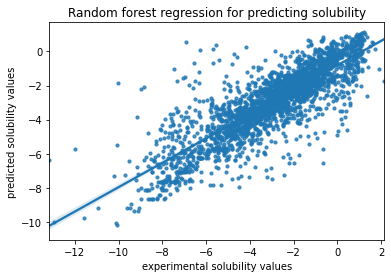

In [22]:
sns.regplot(x=y_test, y=y_predict, scatter_kws={"s": 10}).set(title='Random forest regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

In [23]:
rf.score(x_test, y_test)

0.695907198532593

In [25]:
rf.score(x_train, y_train)

0.955309876628866